<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Referências" data-toc-modified-id="Referências-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Referências</a></span></li></ul></li><li><span><a href="#1.-Amplificador-à-fibra-dopada-com-érbio---EDFA" data-toc-modified-id="1.-Amplificador-à-fibra-dopada-com-érbio---EDFA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Amplificador à fibra dopada com érbio - EDFA</a></span><ul class="toc-item"><li><span><a href="#1.1.-Coeficientes-de-perda-e-ganho" data-toc-modified-id="1.1.-Coeficientes-de-perda-e-ganho-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1. Coeficientes de perda e ganho</a></span></li><li><span><a href="#Topologias-de-amplificadores" data-toc-modified-id="Topologias-de-amplificadores-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Topologias de amplificadores</a></span></li><li><span><a href="#Equações-de-taxa-e-propagação" data-toc-modified-id="Equações-de-taxa-e-propagação-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Equações de taxa e propagação</a></span></li><li><span><a href="#Ruído-do-amplificador" data-toc-modified-id="Ruído-do-amplificador-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ruído do amplificador</a></span></li></ul></li><li><span><a href="#Simulação" data-toc-modified-id="Simulação-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulação</a></span><ul class="toc-item"><li><span><a href="#Modelo-simplificado" data-toc-modified-id="Modelo-simplificado-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Modelo simplificado</a></span></li><li><span><a href="#Simulação" data-toc-modified-id="Simulação-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Simulação</a></span></li></ul></li><li><span><a href="#Transmissão-10G-OOK---40-km" data-toc-modified-id="Transmissão-10G-OOK---40-km-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transmissão 10G OOK - 40 km</a></span></li></ul></div>

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
import os
import numpy as np
import scipy.special as sp
from   scipy.constants import c, h, lambda2nu, nu2lambda
import matplotlib.pyplot as plt
from utils.dsp import firFilter, pulseShape, eyediagram, lowPassFIR
from commpy.utilities  import signal_power, upsample
from utils.models import mzm

In [4]:
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Referências

1. Erbium-Doped Fiber Amplifiers: Fundamentals and Technology, Philippe M. Becker, Anders A. Olsson, Jay R. Simpson, Elsevier, 1999.
1. C. R. Giles and E. Desurvire, "Modeling erbium-doped fiber amplifiers," in Journal of Lightwave Technology, vol. 9, no. 2, pp. 271-283, Feb. 1991.
1. Kir'yanov, A. & Barmenkov, Yuri & Sandoval-Romero, G. Eduardo & Escalante, Luis. (2013). Er3+ Concentration Effects in Commercial Erbium-Doped Silica Fibers Fabricated Through the MCVD and DND Technologies. IEEE Journal of Quantum Electronics. 49. 511-521.

# 1. Amplificador à fibra dopada com érbio - EDFA

## 1.1. Coeficientes de perda e ganho

Há amplificadores ópticos que utilizam os elementos de terras raras (lantanídeos) como meio de ganho pela dopagem do núcleo da fibra durante o processo de manufatura. Nessa família de elementos químicos, estão presentes o érbio (Er), praseodímio (Pr) e itérbio (Yb), utilizados na dopagem de núcleos de fibras ópticas. Cada elemento possui níveis de energia distintos e, consequentemente, propriedades ópticas diferentes.

<img src="./figuras/tabela_periodica.png" width="600">

Como exemplo, o amplificador a fibra dopada com érbio (EDFA) é utilizado na amplificação de sinais ópticos na banda C (1530 - 1565 nm), equanto o amplificador a fibra dopada com praseodímio (PDFA) é utilizado para amplificação na banda O (1260 - 1360 nm).

A topologia básica do EDFA é ilustrado na figura abaixo. O sinal óptico incidente e o sinal de bombeio são acoplados na fibra por meio de acoplador óptico. O sinal de bombeio provê ganho óptico por meio da inversão de população.

<img src="./figuras/edfa_topology.png" width="600">

A natureza amorfa da sílica alarga os níveis de energia do Er$^{3+}$ em bandas. Algumas transições podem ser utilizadas para bombeiar a fibra dopada com érbio (EDF). Os bombeios utilizados no EDFA são nas proximidades de 980 e 1480 nm.

<img src="./figuras/edfa_energy_level.png" width="600">

O coeficiente de ganho e perda [dB/m] varia de acordo com o modelo de fibra dopada utilizada. Por exemplo, os coeficientes de ganho e perda (absorção) das fibras MP980 e R37003 da OFS são ilustradas na próxima figura.

In [5]:
dirPrj = os.path.split(os.getcwd())
dirPrjEDF = dirPrj[0] + '\\jupyter notebooks\\data'
dataEDF = dict()
dataEDF['R37003'] = np.genfromtxt(dirPrjEDF + '\\gilesR37003AE.dat')
dataEDF['MP980']  = np.genfromtxt(dirPrjEDF + '\\giles_MP980.dat')

Text(0.5, 0.98, 'OFS RightWave EDF MP980')

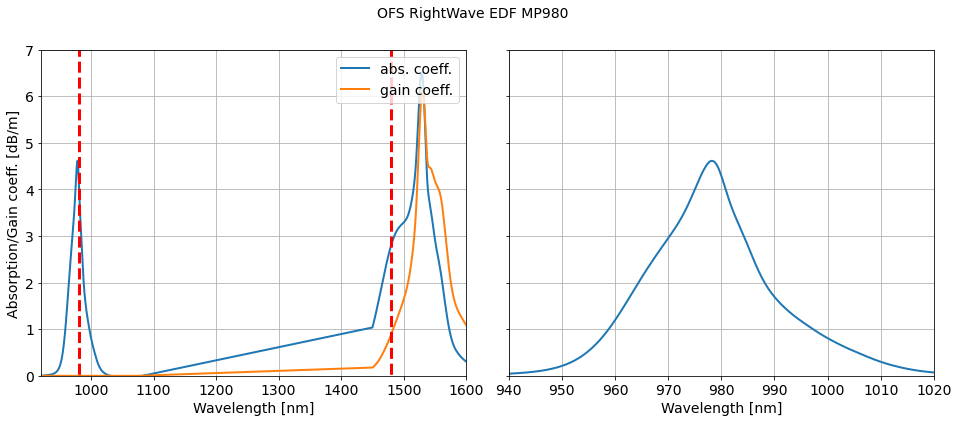

In [6]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))
fig.subplots_adjust(wspace=0.1)

ax[0].plot(dataEDF['MP980'][:,0],
            dataEDF['MP980'][:,1],
            linewidth = 2,
            label = "abs. coeff.")
ax[0].plot(dataEDF['MP980'][:,0],
            dataEDF['MP980'][:,2],
            linewidth = 2,
            label = "gain coeff.")
ax[0].plot([980,980], [-1,8], 'r--', linewidth = 3)
ax[0].plot([1480,1480], [-1,8], 'r--', linewidth = 3)
ax[0].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel('Absorption/Gain coeff. [dB/m]')
ax[0].set_xlim([920,1600])
ax[0].set_ylim([0,7])
ax[0].legend(loc = 'upper right')
ax[0].grid(True)

ax[1].plot(dataEDF['MP980'][:,0],
            dataEDF['MP980'][:,1],
            linewidth = 2)
ax[1].set_xlabel('Wavelength [nm]')
ax[1].set_xlim([940,1020])
ax[1].grid(True)

fig.suptitle('OFS RightWave EDF MP980')

Text(0.5, 0.98, 'OFS RightWave EDF R37003X')

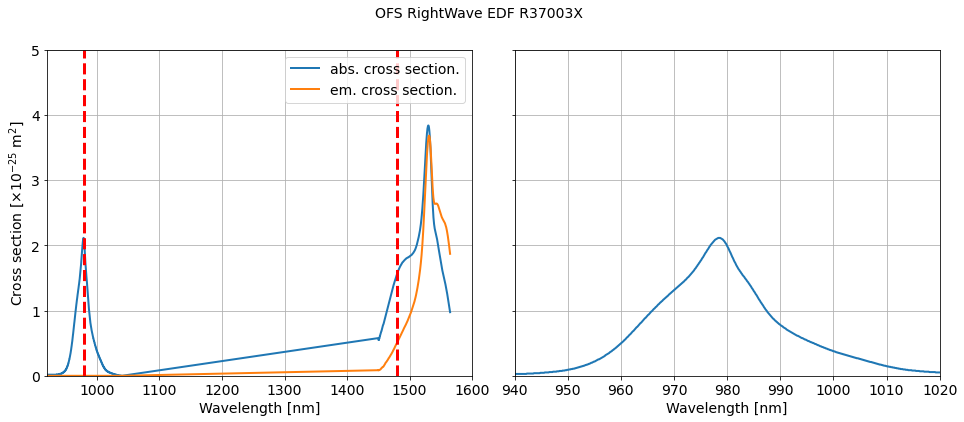

In [8]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))
fig.subplots_adjust(wspace=0.1)

ax[0].plot(dataEDF['R37003'][:,0],
            1e25*dataEDF['R37003'][:,1],
            linewidth = 2,
            label = "abs. cross section.")
ax[0].plot(dataEDF['R37003'][:,0],
            1e25*dataEDF['R37003'][:,2],
            linewidth = 2,
            label = "em. cross section.")
ax[0].plot([980,980], [0,5], 'r--', linewidth = 3)
ax[0].plot([1480,1480], [0,5], 'r--', linewidth = 3)
ax[0].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel(r'Cross section [$\times 10^{-25}$ m${^2}$]')
ax[0].set_xlim([920,1600])
ax[0].set_ylim([0,5])
ax[0].legend(loc = 'upper right')
ax[0].grid(True)

ax[1].plot(dataEDF['R37003'][:,0],
            1e25*dataEDF['R37003'][:,1],
            linewidth = 2)
ax[1].set_xlabel('Wavelength [nm]')
ax[1].set_xlim([940,1020])
ax[1].grid(True)

fig.suptitle('OFS RightWave EDF R37003X')

Observe que, para ambos os exemplos, a amplitude dos coeficientes é maior nas proximidades de 980 nm. Consequentemente, é necessário um laser com menor potência em 980 nm quando comparado com um laser de bombeio em 1480 nm.

Observem que as unidades da ordenada dos dois últimos gráficos são diferentes. Aquele que corresponde à fibra MP980, ilustra o coeficiente de absorção (perda) $\alpha\left( \lambda \right)$ e de ganho $g\left( \lambda \right)$ em [dB/m]. Por outro lado, relacionado à fibra R37003X, o gráfico ilustra a seção cruzada de absorção $\sigma_a\left( \lambda \right)$ e emissão $\sigma_e\left( \lambda \right)$ em [m$^2$]. Esses parâmetros são relacionados por
\begin{align}
    \alpha \left( \lambda \right) &= \sigma_a \left( \lambda \right) \int_0^{2\pi} \int_0^{b} i \left( r, \phi \right) \, n_t\left(r, \phi, z \right) \, r \, \text{d}r \, \text{d}\phi, \\
    g \left( \lambda \right) &= \sigma_e \left( \lambda \right) \int_0^{2\pi} \int_0^{b} i \left( r, \phi \right) \, n_t\left(r, \phi, z \right) \, r \, \text{d}r \, \text{d}\phi.
\end{align}
em que $b$ é o raio da região dopada do núcleo da fibra e  $n_t\left(r, \phi, z \right)$ a densidade de íons na fibra. Esta integral é denominada de integral de sobreposição e quantifica o nível de interação do modo óptico e a região dopada da fibra. 

O termo $i \left( r, \phi \right)$ é a distribuição normalizada do campo do modo fundamental 
\begin{align}
i(r) &= \frac{1}{\pi} \left[ \frac{v}{aV} \frac{J_0\left( u\frac{r}{a} \right) }{J_1(u)} \right]^2, \, r < a, \\
     &= \frac{1}{\pi} \left[ \frac{u}{aV} \frac{K_0\left( v\frac{r}{a} \right) }{K_1(v)} \right]^2, \, r \ge a,
\end{align}
em que $J_{0,1}$ e $K_{0,1}$ é, em ordem, a função de Bessel e função de Bessel modificada e $a$ o raio do núcleo da fibra dopada. Lembrando que $V = a \, k_0 \, \sqrt{n_{core}^2 - n_{clad}^2} = a \, k_0 \, \text{NA}$ é a frequência normalizada e $u^2 + v^2 = V^2$.  Para $1 \le V \le 3$, é possível utilizar a aproximação de $v = 1.1428V-0.9960$.

Para fibra R37003X, o raio $a = 1.45$ $\mu$m, $\text{NA} = 0.26$ e $n_t\left(r, \phi, z \right)$ uniforme e igual a $3.355\times 10^{25}$ m$^{-3}$.

In [10]:
a    = 1.45e-6
NA   = 0.26
lmbd = 1e-9*np.linspace(np.min(dataEDF['R37003'][:,0]), np.max(dataEDF['R37003'][:,0]), len(dataEDF['R37003'][:,0]))
V    = 2*np.pi/lmbd * a * NA
v    = 1.1428*V - 0.9960
u    = np.sqrt(V**2 - v**2)

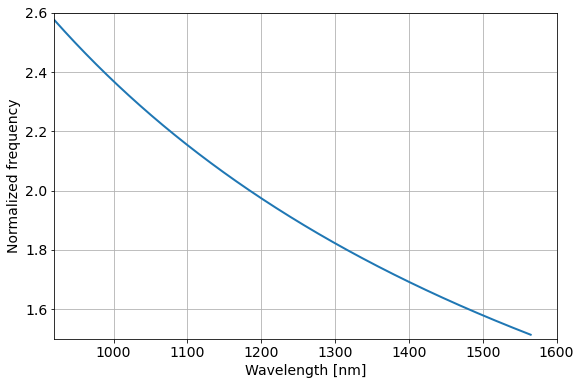

In [11]:
fig = plt.figure(figsize = (9,6))
plt.plot(1e9*lmbd, V, linewidth = 2)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalized frequency')
plt.xlim([920,1600])
plt.ylim([1.5,2.6])
plt.grid(True)

In [12]:
V_max_Idx = np.argmax(V)
V_min_Idx = np.argmin(V)

r = np.linspace(0,4*a,100)
r_core = r[r < a]
r_clad = r[r >= a]
# For mininum lambda
i_core_max = 1/np.pi*(v[V_max_Idx]/(a*V[V_max_Idx])*sp.jv(0, u[V_max_Idx]*r_core/a)/sp.jv(1, u[V_max_Idx]))**2
i_clad_max = 1/np.pi*(u[V_max_Idx]/(a*V[V_max_Idx])*sp.kv(0, v[V_max_Idx]*r_clad/a)/sp.kv(1, v[V_max_Idx]))**2
# For maxinum lambda
i_core_min = 1/np.pi*(v[V_min_Idx]/(a*V[V_min_Idx])*sp.jv(0, u[V_min_Idx]*r_core/a)/sp.jv(1, u[V_min_Idx]))**2
i_clad_min = 1/np.pi*(u[V_min_Idx]/(a*V[V_min_Idx])*sp.kv(0, v[V_min_Idx]*r_clad/a)/sp.kv(1, v[V_min_Idx]))**2

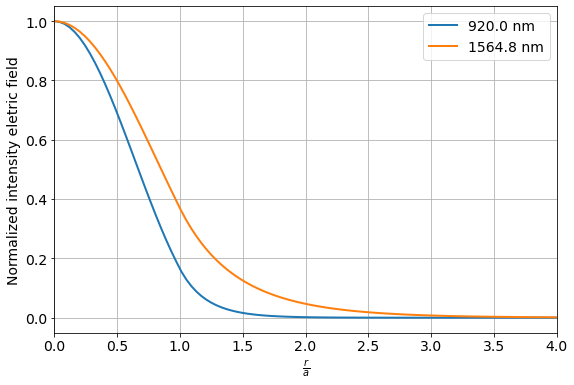

In [13]:
i_max = np.concatenate([i_core_max, i_clad_max])
i_min = np.concatenate([i_core_min, i_clad_min])
fig = plt.figure(figsize = (9,6))
plt.plot(r/a, i_max/np.max(i_max), linewidth = 2, label = "%5.1f nm" % (1e9*lmbd[V_max_Idx]))
plt.plot(r/a, i_min/np.max(i_min), linewidth = 2, label = "%5.1f nm" % (1e9*lmbd[V_min_Idx]))
plt.xlabel(r'$\frac{r}{a}$')
plt.ylabel('Normalized intensity eletric field')
plt.xlim([0,np.max(r)/a])
plt.legend()
plt.grid(True)

In [14]:
nt = 3.355e25
b  = a # considerando que o núcleo está uniformemente dopado
i  = np.zeros([len(r_core), len(lmbd)])
gamma = np.zeros(len(lmbd))
dr = r[2]-r[1]
for j in range(len(lmbd)):
    i[:, j]  = 1/np.pi*(v[j]/(a*V[j])*sp.jv(0, u[j]*r_core/a)/sp.jv(1, u[j]))**2
    gamma[j] = np.sum(i[:, j] * r_core * (2 * np.pi) * dr)
    
alpha = dataEDF['R37003'][:,1] * gamma[j] * nt
g     = dataEDF['R37003'][:,2] * gamma[j] * nt

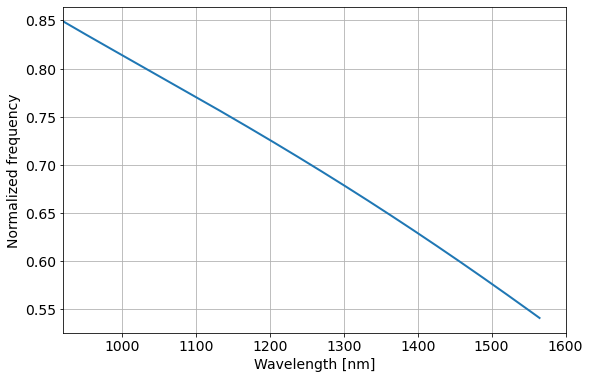

In [15]:
fig = plt.figure(figsize = (9,6))
plt.plot(1e9*lmbd, gamma, linewidth = 2)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalized frequency')
plt.xlim([920,1600])
plt.grid(True)

Text(0.5, 0.98, 'OFS RightWave EDF R37003X')

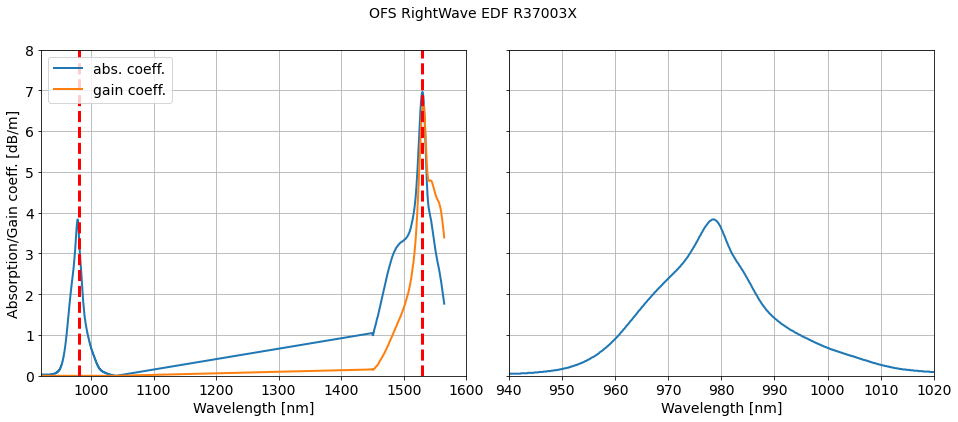

In [16]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))
fig.subplots_adjust(wspace=0.1)

ax[0].plot(dataEDF['R37003'][:,0],
            alpha,
            linewidth = 2,
            label = "abs. coeff.")
ax[0].plot(dataEDF['R37003'][:,0],
            g,
            linewidth = 2,
            label = "gain coeff.")
ax[0].plot([980,980], [0,9], 'r--', linewidth = 3)
ax[0].plot([1530,1530], [0,9], 'r--', linewidth = 3)
ax[0].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel('Absorption/Gain coeff. [dB/m]')
ax[0].set_xlim([920,1600])
ax[0].set_ylim([0,8])
ax[0].legend(loc = 'upper left')
ax[0].grid(True)

ax[1].plot(dataEDF['R37003'][:,0],
            alpha,
            linewidth = 2)
ax[1].set_xlabel('Wavelength [nm]')
ax[1].set_xlim([940,1020])
ax[1].grid(True)

fig.suptitle('OFS RightWave EDF R37003X')

## Topologias de amplificadores

Há três formas de realizar o bombeio em um EDFA:
1. Bombeio copropagante;
2. Bombeio contrapropagante;
3. Bombeio bidirecional.

No bombeio copropagante, o sinal incidente propaga-se na mesma direção do bombeio. Na situação contra-propagante, o sinal incidente propaga-se na direção oposta do sinal de bombeio. O desempenho é similar em ambas situações desde que o EDFA esteja no regime não saturado. No regime de saturação, a eficiência de conservação de potência é, em geral, melhor na configuração contrapropagante.

<img src="./figuras/edfa_topology_forward.png" width="600">

<img src="./figuras/edfa_topology_backward.png" width="600">

Na configuração de bombeamento bidirecional, um EDFA é bombeado de modo simultâneo nos dois sentidos, com o uso de dois lasers, cada um localizado em uma extremidade da fibra. Essa configuração requer dois lasers de bombeio, mas apresenta a vantagem de uma inversão de população e, portanto, ganho de pequeno sinal, relativamente uniforme ao longo de todo o comprimento do amplificador.

<img src="./figuras/edfa_topology_bidirectional.png" width="600">

## Equações de taxa e propagação

Para descrever grande parte da dinâmica do EDFA, é necessário um modelo de quatro níveis. Entretanto, considerando um primeiro estudo, um modelo de dois níveis é suficiente. Neste caso, a densidade total de portadores na EDF $n_t$ relaciona-se com a densidade nos estados de energia $n_1$ e $n_2$ de acordo com
\begin{equation}
n_t\left( r, \phi, z\right) = n_1\left( r, \phi, z\right) + n_2\left( r, \phi, z\right).
\end{equation}

As equações que descrevem a dinâmica do EDFA são denominadas de equações de taxa
\begin{equation}
\frac{\text{d}n_2}{\text{d}t} = \sum_k \frac{P_k i_k \sigma_{ak}}{h \nu_k}n_1\left(r, \phi, z\right) - \sum_k \frac{P_k i_k \sigma_{ek}}{h \nu_k}n_2\left(r, \phi, z\right) - \frac{n_2\left(r, \phi, z\right)}{\tau}
\end{equation}
e equações de propagação
\begin{equation}
\frac{\text{d}P_k}{\text{d}z} = u_k \sigma_{ek} \left( P_k + m \, h \, \nu_k \, \Delta\nu_k \right) \int_0^{2\pi}\int_0^{\infty} i_k\left( r, \phi \right)n_2\left(r, \phi, z\right) \, r\, \text{d}r \, \text{d}\phi - u_k \sigma_{ak} P_k \int_0^{2\pi}\int_0^{\infty} i_k\left( r, \phi \right)n_1\left(r, \phi, z\right) \, r\, \text{d}r \, \text{d}\phi
\end{equation}
em que $P_k$ corresponde á potência da componente $k$ do sinal e $\tau$ o tempo de vida dos portadores no estado excitado. O fator $u_k$ indica a direção de propagação do termo amplificado, se copropagante ($u_k = 1$) ou se contrapropagante ($u_k = -1$).  O termo $m \, h \, \nu\, \Delta \nu_k$ é a contribuição da emissão espontânea estimulada devido aos portadores no estado excitado e amplificados ao longo amplificador. Maiores informações em [2]. 

Considerando uma dopagem uniforme no núcleo da fibra, a integral de sobreposição é escrita como
\begin{equation}
\Gamma_k = \int_0^{2\pi} \int_0^{b} i \left( r, \phi \right) \, r \, \text{d}r \, \text{d}\phi.
\end{equation}
Assim, os coeficientes de ganho e perda são reescritas como
\begin{align}
\alpha_k = \sigma_{ak} \Gamma_k n_t,\\
g_k = \sigma_{ek} \Gamma_k n_t.
\end{align}
As equações de propagação são reescritas como
\begin{equation}
\frac{\text{d}P_k}{\text{d}z} = u_k\frac{\left(g_k + \alpha_k\right)}{\Gamma_k}P_k \int_{0}^{2\pi} \int_0^b \frac{n_2\left( r, \phi, z \right)}{n_t}i_k \, r \, \text{d}r \, \text{d}\phi - u_k \left( \alpha_k + l_k \right)P_k + u_k \frac{g_k}{\Gamma_k} \, m \, h \, \nu\, \Delta \nu_k \int_{0}^{2\pi} \int_0^b \frac{n_2\left( r, \phi, z \right)}{n_t}i_k \, r \, \text{d}r \, \text{d}\phi
\end{equation}
O primeiro termo corresponde ao sinal óptico amplificado. O segundo termo corresponde às perdas do sinal no amplificador. O termo $m \, h \, \nu\, \Delta \nu_k$ é a contribuição da emissão espontânea estimulada devido aos portadores no estado excitado e amplificados ao longo amplificador. 

Considerando que o sistema opera na condição estacionária, ou seja, $\frac{\text{d}n_2}{\text{d}t} = 0$, a população no estado estacionário é
\begin{equation}
n_2\left( r, \phi, z \right) = n_t \frac{\sum_k \frac{\tau \sigma_{ak}}{h \nu_k} P_k i_k}{1+\sum_k \tau \frac{\left(\sigma_{ak}+\sigma_{ek}\right)}{h\nu_k}P_k i_k}
\end{equation}

## Ruído do amplificador

Todos os amplificadores degradam a relação sinal-ruído (SNR) do sinal amplificado. No caso dos amplificadores ópticos, degradam a relação sinal-ruído óptica (OSNR) devido à emissão espontânea que adiciona ruído ao sinal durante a amplificação. No processo de emissão espontânea são gerados fótons de amplitude $A$ e fase $\phi$ aleatórias.

<img src="./figuras/edfa_noise_figure.png" width="600">

A extensão da degradação é quantificada pela figura de ruído (*noise figure*) do amplificador, definida como
\begin{equation}
F_n = \frac{\text{OSNR}_{in}}{\text{OSNR}_{out}}\rightarrow NF = 10\log_{10} \left( \frac{\text{OSNR}_{in}}{\text{OSNR}_{out}} \right)
\end{equation}

A figura de ruído é aproximada por
\begin{equation}
F_n = 2n_{sp}\left( 1 - \frac{1}{G} \right) + \frac{1}{G}
\end{equation}
em que $G$ é o ganho linear do amplificador e $n_{sp}$ o fator de emissão espontânea (ou fator de inversão de população, determinada como
\begin{equation}
n_{sp} = \frac{\sigma_e n_2}{\sigma_e n_2 - \sigma_a n_1}.
\end{equation}
Por fim, a densidade espectral do ruído de emissão espontânea amplificada (ASE) é escrita como
\begin{equation}
S_{sp}\left( \nu \right) = \left( G - 1 \right)n_{sp} h \nu
\end{equation}

# Simulação

## Modelo simplificado

Como primeiro modelo, considere um EDFA com ganho idêntico em todas as frequências, operando no regime não saturado. O sinal é amplificado linearmente e o ruído óptico, cuja densidade é expressa na equação anterior, é adicionado ao sinal.

In [17]:
def edfa_lin(signal, gain, nf, fc, fs):
    nf_lin   = 10**(nf/10)
    gain_lin = 10**(gain/10)
    nsp      = (gain_lin*nf_lin - 1)/(2*(gain_lin - 1))
    s_ase    = (gain_lin - 1) * nsp * h * freq
    p_noise  = s_ase*fs
    mean_noise = 0
    noise    = np.random.normal(mean_noise, np.sqrt(p_noise), signal.shape) + 1j*np.random.normal(mean_noise, np.sqrt(p_noise), signal.shape)
    return signal*np.sqrt(gain_lin) + noise

## Simulação

Uma vez estabelecidas as equações de taxa e propagação, é necessário solucioná-las. O primeiro passo é definir as variáveis das equações, como exemplo, $P_k$ e $\Gamma_k$, e os coeficientes utilizados, como $\sigma_{ak}$ e $\sigma_{ek}$.

É considerada a fibra MP980 da OFS. Portanto, seus parâmetros são:

In [15]:
freq_sigma_ae = dataEDF['MP980'][:,0]
sigma_a = dataEDF['MP980'][:,1]
sigma_e = dataEDF['MP980'][:,2]
NA  = 0.23
a   = 1.56e-6
b   = 1.56e-6
tau = 10e-3
nt  = 0.955e25

# Transmissão 10G OOK - 40 km

In [18]:
def SSF_symmetric(E, hz, Lspan, alpha, gamma, D, Fc, Fs):
    λ  = c/Fc
    α  = 1e-3*alpha/(10*np.log10(np.exp(1)))
    β2 = -(D*λ**2)/(2*np.pi*c)
            
    Nfft = len(E)

    ω = 2*np.pi*Fs*np.fft.fftfreq(Nfft)
    z = 0
    
    E = np.fft.fft(E)
    
    while z <= Lspan:
        # Primeiro passo - operador linear
        E = E*np.exp(-α*(hz/2)+1j*(β2/2)*(ω**2)*(hz/2))

        # Operador não linear
        E = np.fft.ifft(E)            
        E = E*np.exp(1j*gamma*(np.abs(E)**2)*hz)
        
        # Segundo passo - operador linear
        E = np.fft.fft(E)
        E = E*np.exp(-α*(hz/2)+1j*(β2/2)*(ω**2)*(hz/2))
        
        z = z + hz
        
    E = np.fft.ifft(E)
    return E,z

In [19]:
# parâmetros da simulação
SpS = 32
Rs  = 10e9          # Taxa de símbolos (para o caso do OOK Rs = Rb)
Ts  = 1/Rs          # Período de símbolo em segundos
Fa  = 1/(Ts/SpS)    # Frequência de amostragem do sinal (amostras/segundo)
Ta  = 1/Fa          # Período de amostragem

In [20]:
# Parâmetros do sinal
lmbd   = 1550e-9       # comprimento de onda
Pi_dBm = 3             # potência de sinal óptico na entrada do modulador em dBm
Fc     = lambda2nu(lmbd)

In [21]:
# Parâmetros do MZM
Vπ = 2
Vb = -Vπ/2
Pi = 10**(Pi_dBm/10)*1e-3 # potência de sinal óptico em W na entrada do MZM

In [22]:
# Parâmetros da fibra
alpha = 0.16   # dB/Km
D     = 18e-6  # Parâmetro de dispersão s/(m*m) - SMF28 (ps/(nm*km))
gamma = 1.3e-3 # W-1/m
Lspan = 40e3   # Comprimento do enlace m
hz    = 0.1e3  # m

In [23]:
# Parâmetros do receptor
Rd  = 0.85      # responsividade em A/W

In [24]:
# gera sequência de bits pseudo-aleatórios
bits   = np.random.randint(2, size=10000)    
n      = np.arange(0, bits.size)

# mapeia bits para pulsos elétricos
symbTx = 2*bits-1
symbTx = symbTx/np.sqrt(signal_power(symbTx))

# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# plota sinal 
t = np.arange(0, symbTx.size)*(Ta/1e-9)

#idX = np.arange(0,513)
idX = np.arange(0,1023)

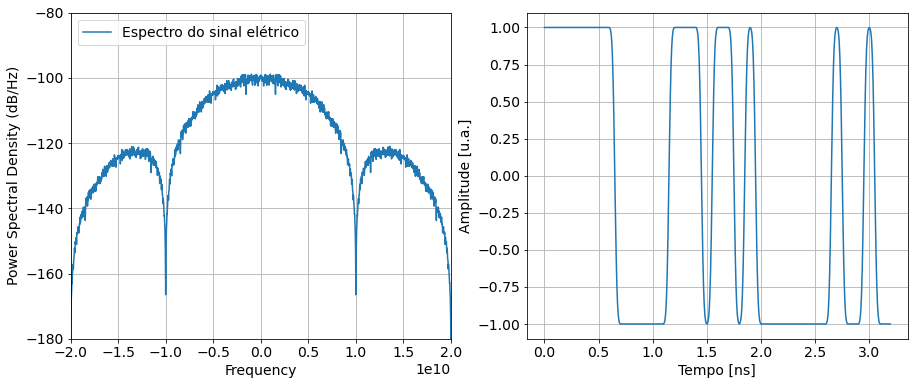

In [25]:
# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)

# plota psd
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].set_xlim(-2*Rs,2*Rs);
axs[0].set_ylim(-180,-80);
axs[0].psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal elétrico')
axs[0].legend(loc='upper left')

axs[1].plot(t[idX], sigTx[idX].real)
axs[1].set_xlabel('Tempo [ns]')
axs[1].set_ylabel('Amplitude [u.a.]')
axs[1].grid(True)

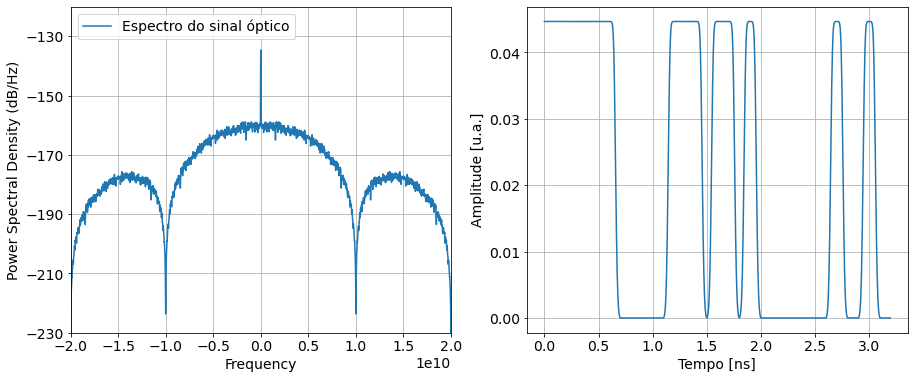

In [26]:
# modulação óptica
Ai     = np.sqrt(Pi)
sigTxo = mzm(Ai, Vπ, sigTx, Vb)

# plota psd
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].set_xlim(-2*Rs,2*Rs);
axs[0].set_ylim(-230,-120);
axs[0].psd(np.abs(sigTxo)**2,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal óptico')
axs[0].legend(loc='upper left')

axs[1].plot(t[idX], np.abs(sigTxo[idX]))
axs[1].set_xlabel('Tempo [ns]')
axs[1].set_ylabel('Amplitude [u.a.]')
axs[1].grid(True)

In [27]:
# transmissão óptica
NFFT = len(sigTxo)
sigTxoFFT = np.fft.fftshift(np.fft.fft(sigTxo))/NFFT
sigTxoPx  = np.abs(sigTxoFFT)**2
freq = np.fft.fftshift(np.fft.fftfreq(len(sigTxoFFT), Ta))

# Fibra óptica
sigRxo, z = SSF_symmetric(sigTxo, hz, Lspan, alpha, gamma, D, Fc, Fa) # Propagation

In [28]:
def edfa_lin(signal, gain, nf, fc, fs):
    nf_lin   = 10**(nf/10)
    gain_lin = 10**(gain/10)
    nsp      = (gain_lin*nf_lin - 1)/(2*(gain_lin - 1))
    s_ase    = (gain_lin - 1) * nsp * h * fc
    p_noise  = s_ase * fs
    mean_noise = 0
    noise    = np.random.normal(mean_noise, np.sqrt(p_noise), signal.shape) + 1j*np.random.normal(mean_noise, np.sqrt(p_noise), signal.shape)
    return signal*gain_lin + noise

In [29]:
sigRxo_t = sigRxo

In [36]:
sigRxo    = sigRxo_t
#alpha_lin = 1e-3*alpha/(10*np.log10(np.exp(1)))
#sigRxo    = sigRxo*np.exp(alpha_lin * z)                             # Amplification
sigRxo    = edfa_lin(sigRxo, 1e-3*alpha*z, 12, Fc, Fa)

sigRxoFFT = np.fft.fftshift(np.fft.fft(sigRxo))/NFFT
sigRxoPx  = np.abs(sigRxoFFT)**2

Potência do sinal Tx (em dBm) = 0.04 dBm
Potência do sinal Rx (em dBm) = 0.05 dBm


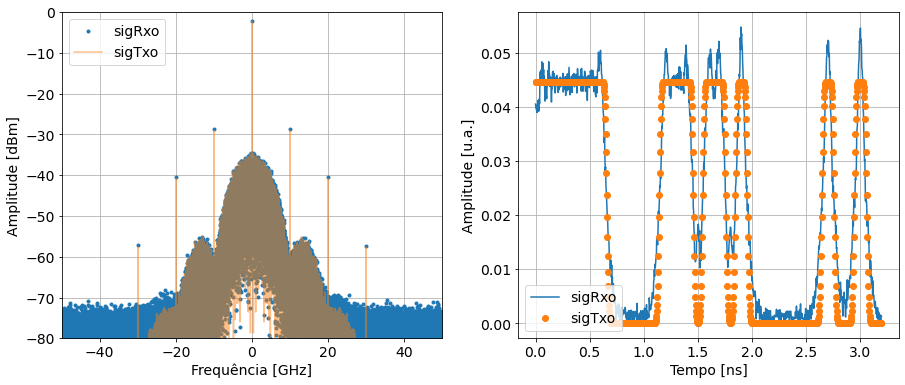

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].plot(1e-9*freq, 10*np.log10(1e3*sigRxoPx), '.', label = 'sigRxo')
axs[0].plot(1e-9*freq, 10*np.log10(1e3*sigTxoPx), alpha = 0.5, label = 'sigTxo')
axs[0].set_ylabel('Amplitude [dBm]')
axs[0].set_xlabel('Frequência [GHz]')
axs[0].set_xlim(-5e-9*Rs,5e-9*Rs)
axs[0].set_ylim(-80,0)
axs[0].grid(True)
axs[0].legend(loc = 'upper left')

axs[1].plot(t[0:1023], np.abs(sigRxo[0:1023]), label = 'sigRxo')
axs[1].plot(t[0:1023], np.abs(sigTxo[0:1023]), 'o', label = 'sigTxo')
axs[1].set_xlabel('Tempo [ns]')
axs[1].set_ylabel('Amplitude [u.a.]')
axs[1].grid(True)
axs[1].legend(loc = 'lower left')

print('Potência do sinal Tx (em dBm) = %.2f dBm' %(10*np.log10(np.sum(sigTxoPx)/1e-3)))
print('Potência do sinal Rx (em dBm) = %.2f dBm' %(10*np.log10(np.sum(sigRxoPx)/1e-3)))

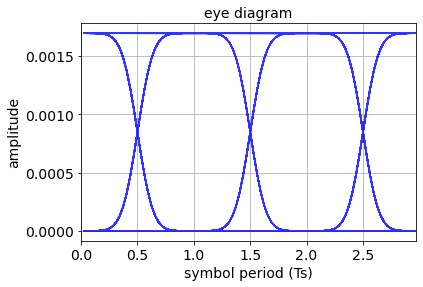

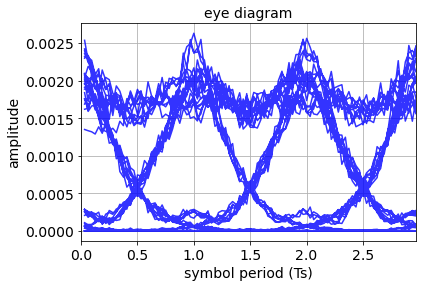

In [38]:
# Recepção do sinal óptico
Nsamples = 2**12

# fotocorrente livre de ruído
Ip   = Rd*np.abs(sigTxo)**2
I_Rx = Rd*np.abs(sigRxo)**2

# diagrama de olho
eyediagram(Ip,  Nsamples, SpS)
eyediagram(I_Rx, Nsamples, SpS)